# Análise da diferença salarial para trabalhadores de TI conforme a escolaridade de cada indivíduo.

Aqui é realizado as análises de quantidade de pessoas e diferença salarial entre homens e mulheres
com funções trabalhistas de TI distribuídos em qualquer setor produtivo no Brasil, 
conforme a escolaridade de cada indivíduo em um recorte de 2009 e 2019.

## Etapas iniciais para realização das análises:

### Imports necessários para realização dos processamentos e análises:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

# Opções gerais necessárias:
pd.options.display.float_format = "{:,.2f}".format

### Variáveis inicias importantes utilizadas durante a realização dos processamentos e análises:

In [2]:
# Criando indices dos sexos:
sexo = {1: 'Masc.', 2: 'Fem.'}

# Criando indices das raças:
escol = {5: 'Fundamental Completo', 7: 'Médio Completo', 9: 'Superior Completo', 10: 'Mestrado', 11: 'Doutorado'}

# Variável com o nível de confiança a ser considerado e utilizado:
nivel_confianca = 0.01

# Montagem da paleta de cores utilizadas:
pal = sns.color_palette("pastel")

# Definição das cores para cada sexo (masc: verde pastel, fem: laranja pastel)
color_masc = pal[2]
color_fem = pal[1]

### Etapa de leitura dos dados das tabelas em CSV para 2009 e 2019:

In [3]:
# Leitura da tabela de dados gerais para 2009:
RAIS_GERAL_2009 = pd.read_csv("../data/DATA_RAIS_GERAL_2009.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_GERAL_2009.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE',
                            'Escolaridade após 2005':'Escolaridade', 'Raça Cor':'Raça', 
                            'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

In [4]:
# Leitura da tabela de dados gerais para 2019:
RAIS_GERAL_2019 = pd.read_csv("../data/DATA_RAIS_GERAL_2019.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_GERAL_2019.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE',
                            'Escolaridade após 2005':'Escolaridade', 'Raça Cor':'Raça', 
                            'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

### Correção da coluna de escolaridade para utilização correta:

In [5]:
# Retirando dados referentes a indivíduos com escolaridade 1 (Analfabeto):
RAIS_GERAL_2009 = RAIS_GERAL_2009[RAIS_GERAL_2009['Escolaridade'] != 1]
RAIS_GERAL_2019 = RAIS_GERAL_2019[RAIS_GERAL_2019['Escolaridade'] != 1]

# Retirando dados referentes a indivíduos com escolaridade 2 (Fundamental Incompleto):
RAIS_GERAL_2009 = RAIS_GERAL_2009[RAIS_GERAL_2009['Escolaridade'] != 2]
RAIS_GERAL_2019 = RAIS_GERAL_2019[RAIS_GERAL_2019['Escolaridade'] != 2]

# Retirando dados referentes a indivíduos com escolaridade 3 (Fundamental Incompleto):
RAIS_GERAL_2009 = RAIS_GERAL_2009[RAIS_GERAL_2009['Escolaridade'] != 3]
RAIS_GERAL_2019 = RAIS_GERAL_2019[RAIS_GERAL_2019['Escolaridade'] != 3]

# Retirando dados referentes a indivíduos com escolaridade 4 (Fundamental Incompleto):
RAIS_GERAL_2009 = RAIS_GERAL_2009[RAIS_GERAL_2009['Escolaridade'] != 4]
RAIS_GERAL_2019 = RAIS_GERAL_2019[RAIS_GERAL_2019['Escolaridade'] != 4]

# Substituindo o status de médio incompleto (6) para fundamental completo:
RAIS_GERAL_2009['Escolaridade'] = RAIS_GERAL_2009['Escolaridade'].replace(6, 5).replace(6, 5)
RAIS_GERAL_2019['Escolaridade'] = RAIS_GERAL_2019['Escolaridade'].replace(6, 5).replace(6, 5)

# Substituindo o status de superior incompleto (6) para médio completo:
RAIS_GERAL_2009['Escolaridade'] = RAIS_GERAL_2009['Escolaridade'].replace(8, 7).replace(8, 7)
RAIS_GERAL_2019['Escolaridade'] = RAIS_GERAL_2019['Escolaridade'].replace(8, 7).replace(8, 7)

### Correção da inflação do período analisado até o atual das remunerações pelo fator de correção INPC (IBGE):

In [6]:
# Foi utilizado o Índice Nacional de Preços ao Consumidor (INPC - IBGE).

# Índice de correção de inflação para o período de 12/2009 (data dos dados para 2009) 
# até 04/2022 (fator de correção mais recente no último processamento dos dados).
fator_correcao_inflacao_2009 = 2.14068130

RAIS_GERAL_2009["Remuneração"] = RAIS_GERAL_2009["Remuneração"] * fator_correcao_inflacao_2009

# Índice de correção de inflação para o período de 12/2019 (data dos dados para 2019) 
# até 04/2022 (fator de correção mais recente no último processamento dos dados).
fator_correcao_inflacao_2019 = 1.22858430

RAIS_GERAL_2019["Remuneração"] = RAIS_GERAL_2019["Remuneração"] * fator_correcao_inflacao_2019

### Exibição das tabelas gerais para cada ano:

In [7]:
# Exibindo os cinco primeiros dados da tabela de 2009:
RAIS_GERAL_2009.head()

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
4,AC,142530,47814,5,32,08,"1,806.35",1
5,AC,212420,27317,5,22,08,"1,712.55",1
6,AC,212405,63119,5,53,09,"13,618.97",1
7,AC,317205,63119,5,50,09,"9,709.62",1
8,AC,317205,63119,5,50,09,"7,134.12",1


In [8]:
# Exibindo os cinco primeiros dados da tabela de 2009:
RAIS_GERAL_2019.head()

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
14,MS,142530,77331,5,42,2,"3,997.87",1
15,MS,317210,47521,5,23,2,"2,168.70",1
16,MS,317210,49302,5,24,8,"2,896.19",1
17,MS,212405,62031,5,29,2,"4,123.44",1
18,MS,212405,47890,5,36,8,"2,211.45",1


## Análise da frequência (quantidade de pessoas) dos dados entre homens e mulheres distribuídos conforme a escolaridade de cada indivíduo:

### Criação das tabelas para relatório e tabela para formação do gráfico:

In [9]:
# Tabela principal para quantidade em 2009:
RAIS_GERAL_2009_QNT = pd.crosstab(RAIS_GERAL_2009["Escolaridade"], RAIS_GERAL_2009["Sexo"].replace(sexo))
RAIS_GERAL_2009_QNT.insert(1, "% Fem.", RAIS_GERAL_2009_QNT["Fem."] / (RAIS_GERAL_2009_QNT["Fem."] + RAIS_GERAL_2009_QNT["Masc."]) * 100)
RAIS_GERAL_2009_QNT.insert(3, "% Masc.", RAIS_GERAL_2009_QNT["Masc."] / (RAIS_GERAL_2009_QNT["Fem."] + RAIS_GERAL_2009_QNT["Masc."]) * 100)

RAIS_GERAL_2009_QNT.rename(index = escol, inplace = True)

In [10]:
RAIS_GERAL_2009_QNT

Sexo,Fem.,% Fem.,Masc.,% Masc.
Escolaridade,,,,
Fundamental Completo,3067,22.50,10565,77.50
Médio Completo,48242,25.33,142199,74.67
Superior Completo,49510,26.86,134800,73.14
Mestrado,484,25.88,1386,74.12
Doutorado,305,29.16,741,70.84


In [11]:
# Tabela principal para quantidade em 2019:
RAIS_GERAL_2019_QNT = pd.crosstab(RAIS_GERAL_2019["Escolaridade"], RAIS_GERAL_2019["Sexo"].replace(sexo))
RAIS_GERAL_2019_QNT.insert(1, "% Fem.", RAIS_GERAL_2019_QNT["Fem."] / (RAIS_GERAL_2019_QNT["Fem."] + RAIS_GERAL_2019_QNT["Masc."]) * 100)
RAIS_GERAL_2019_QNT.insert(3, "% Masc.", RAIS_GERAL_2019_QNT["Masc."] / (RAIS_GERAL_2019_QNT["Fem."] + RAIS_GERAL_2019_QNT["Masc."]) * 100)

RAIS_GERAL_2019_QNT.rename(index = escol, inplace = True)

In [12]:
RAIS_GERAL_2019_QNT

Sexo,Fem.,% Fem.,Masc.,% Masc.
Escolaridade,,,,
Fundamental Completo,2417,25.73,6978,74.27
Médio Completo,45085,21.78,161922,78.22
Superior Completo,79410,22.21,278099,77.79
Mestrado,1719,22.82,5813,77.18
Doutorado,398,24.57,1222,75.43


In [13]:
# Tabela para gráfico da quantidade em 2009:
RAIS_GERAL_2009_QNT.insert(4, "Total", RAIS_GERAL_2009_QNT["% Masc."] + RAIS_GERAL_2009_QNT["% Fem."])
RAIS_GERAL_2009_QNT.insert(5, "Ano", "2009")

# Tabela para gráfico da quantidade em 2019:
RAIS_GERAL_2019_QNT.insert(4, "Total", RAIS_GERAL_2019_QNT["% Masc."] + RAIS_GERAL_2019_QNT["% Fem."])
RAIS_GERAL_2019_QNT.insert(5, "Ano", "2019")

# Junção das tabelas anteriores em uma para geração do gráfico:
RAIS_GERAL_QNT_GRAF = pd.concat([RAIS_GERAL_2009_QNT, RAIS_GERAL_2019_QNT]).reset_index()

### Criação do gráfico com os dados referentes a quantidade:

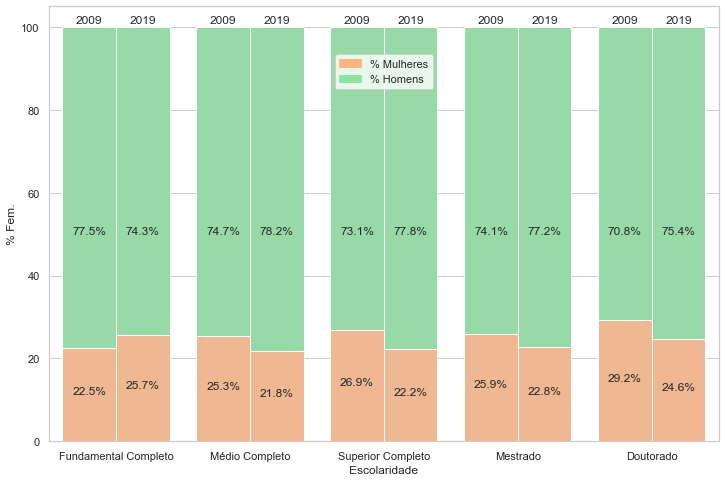

In [14]:
# Montagem inicial da imagem do gráfico:
plt.figure(figsize = (12, 8))

# Configuração da grid da imagem:
sns.set(style = "whitegrid")

# Criação da primeira barra, referente ao total de 100% que fica atrás pela próxima barra:
bar1 = sns.barplot(x = "Escolaridade", y = "Total", hue = "Ano", data = RAIS_GERAL_QNT_GRAF, palette = {"2009": color_masc,"2019": color_masc})

# Captura da quantidade de barras existentes até o momento:
patches = bar1.patches

# Escrita da porcentagem para cada barra existente até o momento (porcentagem dos homens):
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar1.annotate('{:.1f}%'.format(RAIS_GERAL_QNT_GRAF["% Masc."][i]), (x, y), ha='center')

# Escrita do valor do ano para cada barra em dupla:
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+1
    bar1.annotate('{}'.format(RAIS_GERAL_QNT_GRAF["Ano"][i]), (x, y), ha='center')

# Criação da segunda barra, referente a porcentagem das mulheres:
bar2 = sns.barplot(x = "Escolaridade", y = "% Fem.", hue = "Ano", data = RAIS_GERAL_QNT_GRAF, palette = {"2009": color_fem,"2019": color_fem})

# Captura das barras recém criadas:
patches = bar2.patches[10:]

# Escrita da porcentagem para cada barra capturada das mulheres:
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar2.annotate('{:.1f}%'.format(RAIS_GERAL_QNT_GRAF["% Fem."][i]), (x, y), ha='center')

# Finalização de configurações de exibição do gráfico:
top_bar = mpatches.Patch(label='% Mulheres', color = color_fem)
bottom_bar = mpatches.Patch(label='% Homens', color = color_masc)
plt.legend(handles=[top_bar, bottom_bar], loc = 'center', bbox_to_anchor = (.45, .8, .1, .1))

plt.savefig("./figures/svg/qnt_sexo_escolaridade.svg")

## Análise das médias salariais e diferenças:

### Distribuição da remuneração para cada sexo cruzado pela escolaridade:

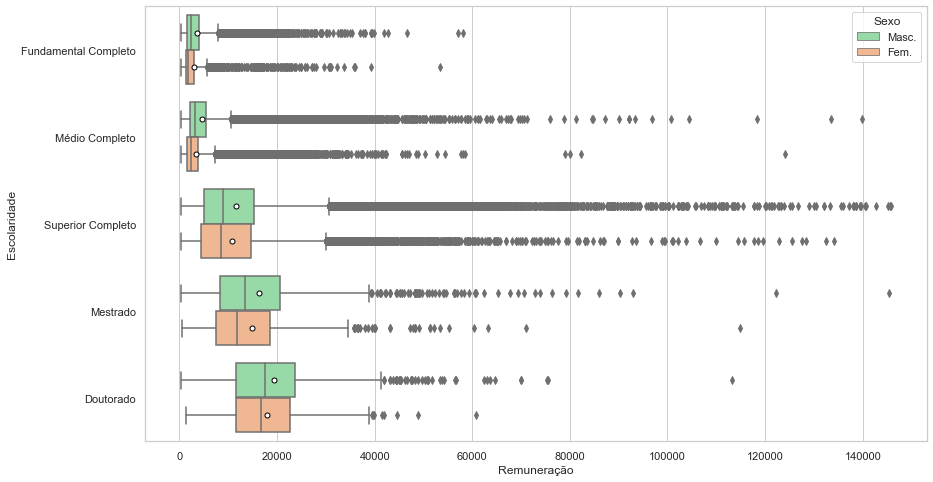

In [15]:
RAIS_GERAL_2009_BOX = RAIS_GERAL_2009.copy()
RAIS_GERAL_2009_BOX["Sexo"].replace(sexo, inplace = True)
RAIS_GERAL_2009_BOX["Escolaridade"].replace(escol, inplace = True)

box = sns.boxplot(x = 'Remuneração', y = 'Escolaridade', hue = 'Sexo', data = RAIS_GERAL_2009_BOX, orient = 'h', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"5"}, order = escol.values(),
                       palette = {"Masc.": color_masc, "Fem.": color_fem})
box.figure.set_size_inches(14, 8)
box.figure.savefig("./figures/png/boxplot_sexo_escolaridade_2009.png", dpi = 300)

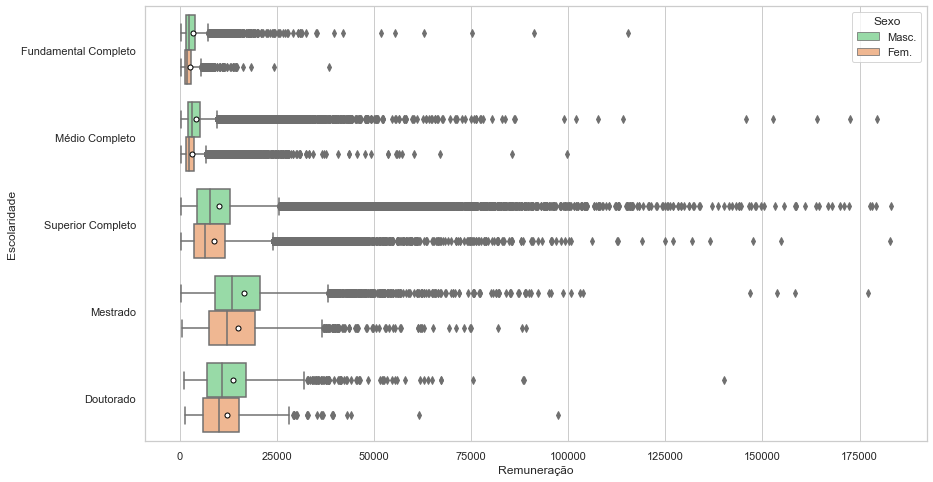

In [16]:
RAIS_GERAL_2019_BOX = RAIS_GERAL_2019.copy()
RAIS_GERAL_2019_BOX["Sexo"].replace(sexo, inplace = True)
RAIS_GERAL_2019_BOX["Escolaridade"].replace(escol, inplace = True)

box = sns.boxplot(x = 'Remuneração', y = 'Escolaridade', hue = 'Sexo', data = RAIS_GERAL_2019_BOX, orient = 'h', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"5"}, order = escol.values(),
                        palette = {"Masc.": color_masc, "Fem.": color_fem})
box.figure.set_size_inches(14, 8)
box.figure.savefig("./figures/png/boxplot_sexo_escolaridade_2019.png", dpi = 300)

### Criação das tabelas com as diferenças salarias e da tabela para geração do gráfico:

In [17]:
# Tabela principal para média e diferença salarial em 2009:
RAIS_GERAL_2009_MEDIA = pd.crosstab(RAIS_GERAL_2009["Escolaridade"], RAIS_GERAL_2009["Sexo"].replace(sexo), values = RAIS_GERAL_2009.Remuneração, aggfunc = 'mean')
RAIS_GERAL_2009_MEDIA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2009_MEDIA["Fem."] - RAIS_GERAL_2009_MEDIA["Masc."]) / RAIS_GERAL_2009_MEDIA["Masc."]) * 100)

RAIS_GERAL_2009_MEDIA.rename(index = escol, inplace = True)
RAIS_GERAL_2009_MEDIA.head()

Sexo,Fem.,Masc.,Diferença Salarial
Escolaridade,,,
Fundamental Completo,"3,063.13","3,654.84",-16.19
Médio Completo,"3,415.53","4,663.50",-26.76
Superior Completo,"10,709.20","11,627.56",-7.90
Mestrado,"14,837.63","16,366.94",-9.34
Doutorado,"17,980.49","19,366.05",-7.15


In [18]:
# Tabela principal para média e diferença salarial em 2019:
RAIS_GERAL_2019_MEDIA = pd.crosstab(RAIS_GERAL_2019["Escolaridade"], RAIS_GERAL_2019["Sexo"].replace(sexo), values = RAIS_GERAL_2019.Remuneração, aggfunc = 'mean')
RAIS_GERAL_2019_MEDIA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2019_MEDIA["Fem."] - RAIS_GERAL_2019_MEDIA["Masc."]) / RAIS_GERAL_2019_MEDIA["Masc."]) * 100)

RAIS_GERAL_2019_MEDIA.rename(index = escol, inplace = True)
RAIS_GERAL_2019_MEDIA.head()

Sexo,Fem.,Masc.,Diferença Salarial
Escolaridade,,,
Fundamental Completo,"2,581.96","3,533.80",-26.94
Médio Completo,"3,210.00","4,345.89",-26.14
Superior Completo,"8,916.86","10,069.48",-11.45
Mestrado,"14,944.19","16,629.56",-10.13
Doutorado,"12,213.15","13,865.67",-11.92


In [19]:
RAIS_GERAL_2009_MEDIA.insert(3, "Ano", "2009")
RAIS_GERAL_2019_MEDIA.insert(3, "Ano", "2019")
RAIS_GERAL_MEDIA_GRAF = pd.concat([RAIS_GERAL_2009_MEDIA, RAIS_GERAL_2019_MEDIA]).reset_index()

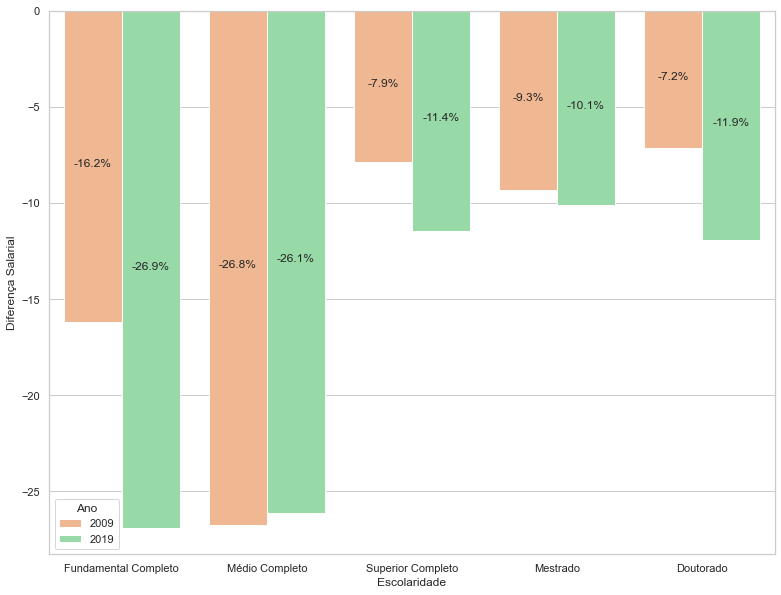

In [20]:
# Criação do gráfico inicial:
plt.figure(figsize = (13, 10))

# Configuração do grid do gráfico:
sns.set(style = "whitegrid")

# Criação da barra referente as diferenças salarias:
bar = sns.barplot(x = "Escolaridade", y = "Diferença Salarial", hue = "Ano", data = RAIS_GERAL_MEDIA_GRAF, palette = {"2009": color_fem,"2019": color_masc})

# Captura da quantidade de barras existentes:
patches = bar.patches

# Prenchimento das porcentagens das diferenças salariais em cada barra:
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar.annotate('{:.1f}%'.format(RAIS_GERAL_MEDIA_GRAF["Diferença Salarial"][i]), (x, y), ha='center')

plt.savefig("./figures/svg/dif_salarial_sexo_escolaridade_media.svg")

In [21]:
# Tabela principal para mediana e diferença salarial em 2009:
RAIS_GERAL_2009_MEDIANA = pd.crosstab(RAIS_GERAL_2009["Escolaridade"], RAIS_GERAL_2009["Sexo"].replace(sexo), values = RAIS_GERAL_2009.Remuneração, aggfunc = 'median')
RAIS_GERAL_2009_MEDIANA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2009_MEDIANA["Fem."] - RAIS_GERAL_2009_MEDIANA["Masc."]) / RAIS_GERAL_2009_MEDIANA["Masc."]) * 100)

RAIS_GERAL_2009_MEDIANA.rename(index = escol, inplace = True)
RAIS_GERAL_2009_MEDIANA.head()

Sexo,Fem.,Masc.,Diferença Salarial
Escolaridade,,,
Fundamental Completo,"1,839.53","2,411.26",-23.71
Médio Completo,"2,439.93","3,258.50",-25.12
Superior Completo,"8,515.50","9,003.61",-5.42
Mestrado,"11,773.75","13,350.64",-11.81
Doutorado,"16,646.99","17,448.48",-4.59


In [22]:
# Tabela principal para média e diferença salarial em 2019:
RAIS_GERAL_2019_MEDIANA = pd.crosstab(RAIS_GERAL_2019["Escolaridade"], RAIS_GERAL_2019["Sexo"].replace(sexo), values = RAIS_GERAL_2019.Remuneração, aggfunc = 'median')
RAIS_GERAL_2019_MEDIANA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2019_MEDIANA["Fem."] - RAIS_GERAL_2019_MEDIANA["Masc."]) / RAIS_GERAL_2019_MEDIANA["Masc."]) * 100)

RAIS_GERAL_2019_MEDIANA.rename(index = escol, inplace = True)
RAIS_GERAL_2019_MEDIANA.head()

Sexo,Fem.,Masc.,Diferença Salarial
Escolaridade,,,
Fundamental Completo,"1,891.17","2,499.41",-24.34
Médio Completo,"2,431.37","3,169.75",-23.29
Superior Completo,"6,666.97","7,914.23",-15.76
Mestrado,"12,278.96","13,594.78",-9.68
Doutorado,"10,132.55","10,960.86",-7.56


In [23]:
RAIS_GERAL_2009_MEDIANA.insert(3, "Ano", "2009")

RAIS_GERAL_2019_MEDIANA.insert(3, "Ano", "2019")

RAIS_GERAL_MEDIANA_GRAF = pd.concat([RAIS_GERAL_2009_MEDIANA, RAIS_GERAL_2019_MEDIANA]).reset_index()

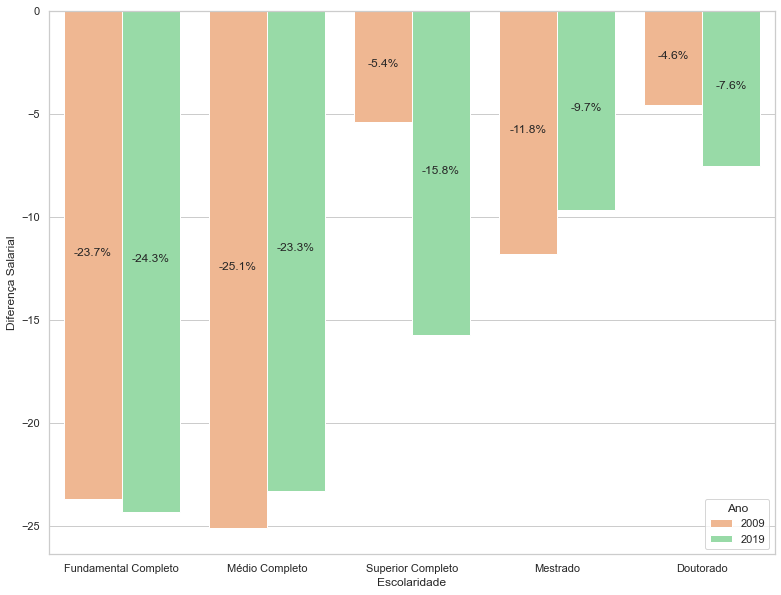

In [24]:
# Criação do gráfico inicial:
plt.figure(figsize = (13, 10))

# Configuração do grid do gráfico:
sns.set(style = "whitegrid")

# Criação da barra referente as diferenças salarias:
bar = sns.barplot(x = "Escolaridade", y = "Diferença Salarial", hue = "Ano", data = RAIS_GERAL_MEDIANA_GRAF, palette = {"2009": color_fem,"2019": color_masc})

# Captura da quantidade de barras existentes:
patches = bar.patches

# Prenchimento das porcentagens das diferenças salariais em cada barra:
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar.annotate('{:.1f}%'.format(RAIS_GERAL_MEDIANA_GRAF["Diferença Salarial"][i]), (x, y), ha='center')

plt.savefig("./figures/svg/dif_salarial_sexo_escolaridade_mediana.svg")

### Teste de hipótese para cada grupo de médias por CBOs:

In [25]:
def teste_hipotese(first_data, second_data, confidence_interval):
    from scipy.stats import mannwhitneyu 
    
    stat, p_valor = mannwhitneyu(first_data, second_data, alternative = 'less')
    
    if p_valor <= confidence_interval:
        return stat, p_valor, 'Medianas estatisticamente diferentes'
    else:
        return stat, p_valor, 'Medianas estatisticamente iguais'

In [26]:
TESTE_HIP_2009 = pd.DataFrame(columns = ['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.'])

for e in escol:
    df1 = RAIS_GERAL_2009.query("Sexo == 1").replace(escol).query("Escolaridade == '{}'".format(escol[e])).Remuneração
    df2 = RAIS_GERAL_2009.query("Sexo == 2").replace(escol).query("Escolaridade == '{}'".format(escol[e])).Remuneração

    mean1 = df1.median()
    mean2 = df2.median()

    if mean1 < mean2:
        stat, p, result= teste_hipotese(df1, df2, nivel_confianca)
    else:
        stat, p, result = teste_hipotese(df2, df1, nivel_confianca)
    
    TESTE_HIP_2009.loc[escol[e]] = [str(stat), '0.01 > {:.5f}...'.format(p), result]

RAIS_GERAL_2009_HIP = pd.merge(RAIS_GERAL_2009_MEDIANA, TESTE_HIP_2009, left_index=True, right_index=True)
RAIS_GERAL_2009_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2009_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2009_HIP.head()

,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.
Fundamental Completo,"1,839.53","2,411.26",12710243.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
Médio Completo,"2,439.93","3,258.50",2640099585.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
Superior Completo,"8,515.50","9,003.61",3171397995.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
Mestrado,"11,773.75","13,350.64",305575.0,0.01 > 0.00176...,Medianas estatisticamente diferentes
Doutorado,"16,646.99","17,448.48",109465.0,0.01 > 0.21287...,Medianas estatisticamente iguais


In [27]:
TESTE_HIP_2019 = pd.DataFrame(columns = ['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.'])

for e in escol:
    df1 = RAIS_GERAL_2019.query("Sexo == 1").replace(escol).query("Escolaridade == '{}'".format(escol[e])).Remuneração
    df2 = RAIS_GERAL_2019.query("Sexo == 2").replace(escol).query("Escolaridade == '{}'".format(escol[e])).Remuneração
    
    mean1 = df1.median()
    mean2 = df2.median()

    if mean1 < mean2:
        stat, p, result= teste_hipotese(df1, df2, nivel_confianca)
    else:
        stat, p, result = teste_hipotese(df2, df1, nivel_confianca)
    
    TESTE_HIP_2019.loc[escol[e]] = [str(stat), '0.01 > {:.5f}...'.format(p), result]

RAIS_GERAL_2019_HIP = pd.merge(RAIS_GERAL_2019_MEDIANA, TESTE_HIP_2019, left_index=True, right_index=True)
RAIS_GERAL_2019_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2019_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2019_HIP.head()

,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.
Fundamental Completo,"1,891.17","2,499.41",6529452.5,0.01 > 0.00000...,Medianas estatisticamente diferentes
Médio Completo,"2,431.37","3,169.75",2747435797.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
Superior Completo,"6,666.97","7,914.23",9902646227.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
Mestrado,"12,278.96","13,594.78",4566314.5,0.01 > 0.00000...,Medianas estatisticamente diferentes
Doutorado,"10,132.55","10,960.86",222752.5,0.01 > 0.00587...,Medianas estatisticamente diferentes
